In [1]:
import argparse
from glob import glob
from os import path
import pickle
from nilearn import plotting
from nistats.thresholding import map_threshold
import sys

from utils.firstlevel_utils import get_first_level_objs
from utils.plot_utils import (plot_design, plot_design_timeseries, 
                                         plot_design_heatmap, plot_contrast,
                                        plot_map, plot_task_maps)

/home/users/sjshim/miniconda3/envs/fmri_analysis/lib/python3.9/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "
/tmp/ipykernel_1168/3366776612.py:6: UserWarning: 

 | Using Nistats with Nilearn versions >= 0.7.0 is redundant and potentially conflicting.
 | Nilearn versions 0.7.0 and up offer all the functionality of Nistats as well the latest features and fixes.
 | We strongly recommend uninstalling Nistats and using Nilearn's stats & reporting modules.

  from nistats.thresholding import map_threshold


In [2]:
parser = argparse.ArgumentParser(description='2nd level Entrypoint Script.')
parser.add_argument('-derivatives_dir', default=None)
parser.add_argument('--skip_first', action='store_true')
parser.add_argument('--skip_second', action='store_true')
parser.add_argument('--save', action='store_true')

if '-derivatives_dir' in sys.argv or '-h' in sys.argv:
    args = parser.parse_args()
else:
    args = parser.parse_args([])
    args.derivatives_dir = '/oak/stanford/groups/russpold/data/network_grant/discovery_BIDS/derivatives'
    args.data_dir = '/oak/stanford/groups/russpold/data/network_grant/discovery_BIDS'
    args.tasks = ['stopSignal']
    args.rt=True
    args.save=True
    %matplotlib inline

In [3]:
# set paths
first_level_dir = path.join(args.derivatives_dir, '1stlevel')
second_level_dir = path.join(args.derivatives_dir,'2ndlevel')
fmriprep_dir = '/oak/stanford/groups/russpold/data/network_grant/discovery_BIDS/derivatives/SOBC_analysis'
tasks = ['stopSignal']
save = args.save
run_first_level = not args.skip_first
run_second_level = not args.skip_second

# Design Visualization

In [6]:
# load design
subject_id, task = 's10', 'stopSignal'
files = get_first_level_objs(subject_id, task, first_level_dir, regress_rt=True)
print(files)
subjinfo = pickle.load(open(files[0], 'rb'))

/oak/stanford/groups/russpold/data/network_grant/discovery_BIDS/derivatives/1stlevel/s10/stopSignal/firstlevel*RT-True_beta-False*pkl
['/oak/stanford/groups/russpold/data/network_grant/discovery_BIDS/derivatives/1stlevel/s10/stopSignal/firstlevel_RT-True_beta-False.pkl']


ModuleNotFoundError: No module named 'sklearn.externals.joblib'

In [ ]:
# display the glm to make sure its not wonky - useful for doublechecking, not necessary #
#    from nistats.reporting import plot_design_matrix
#    import matplotlib.pyplot as plt
#    fig, (ax1) = plt.subplots(figsize=(20, 10), nrows=1, ncols=1)
#    ax1.set_title(subjinfo)
#    plot_design_matrix(design_matrix, ax=ax1)
####

In [ ]:
plot_design(subjinfo)
plot_design_timeseries(subjinfo, 0, 100)
plot_design_heatmap(subjinfo)

# First Level Visualization

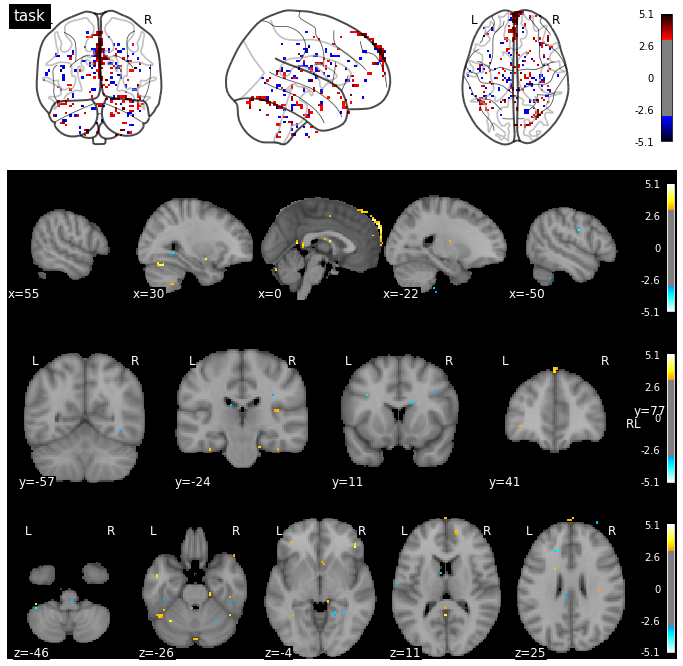

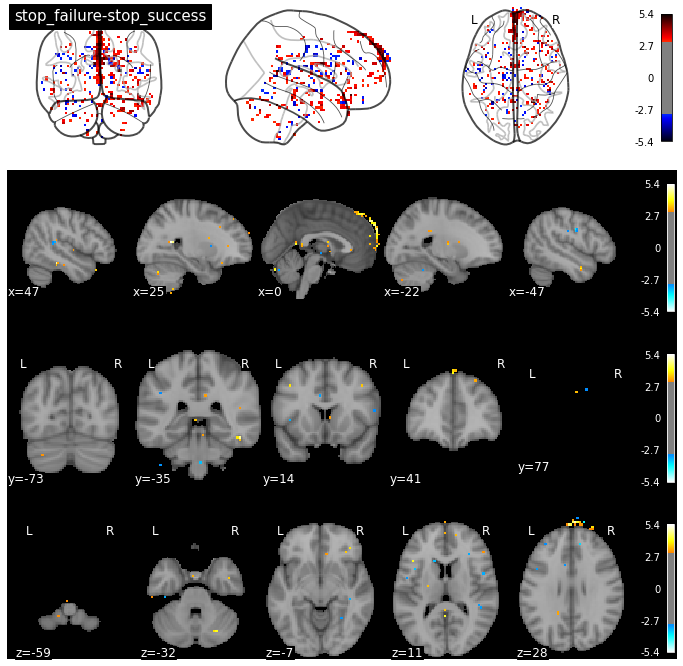

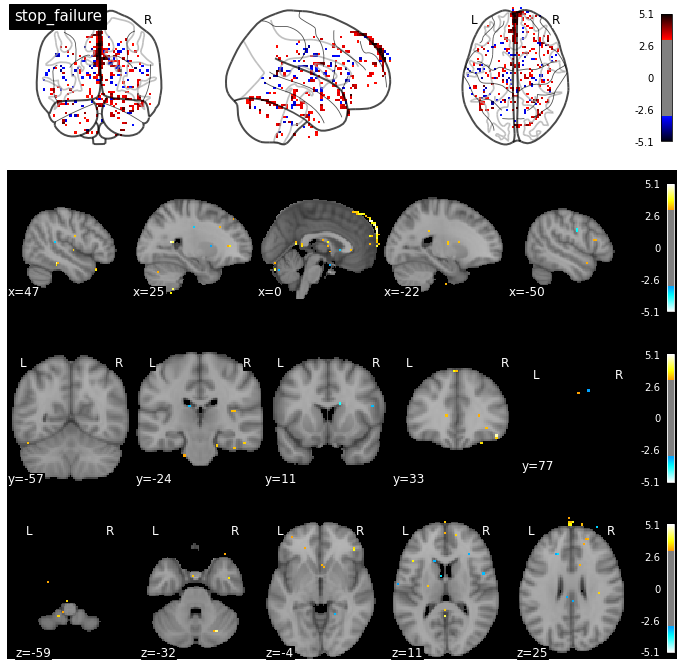

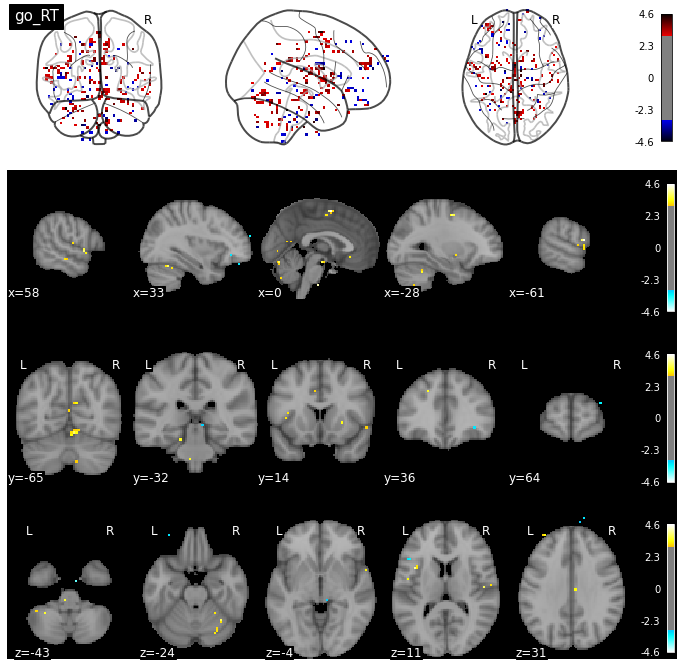

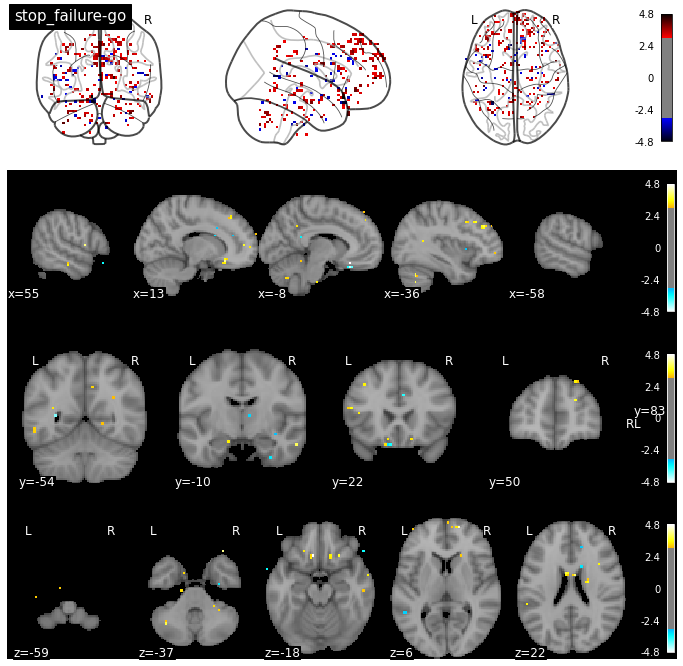

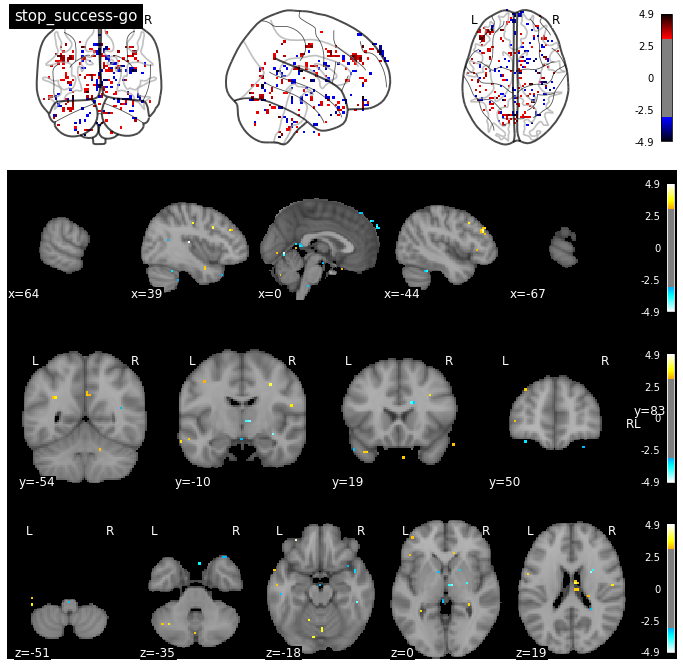

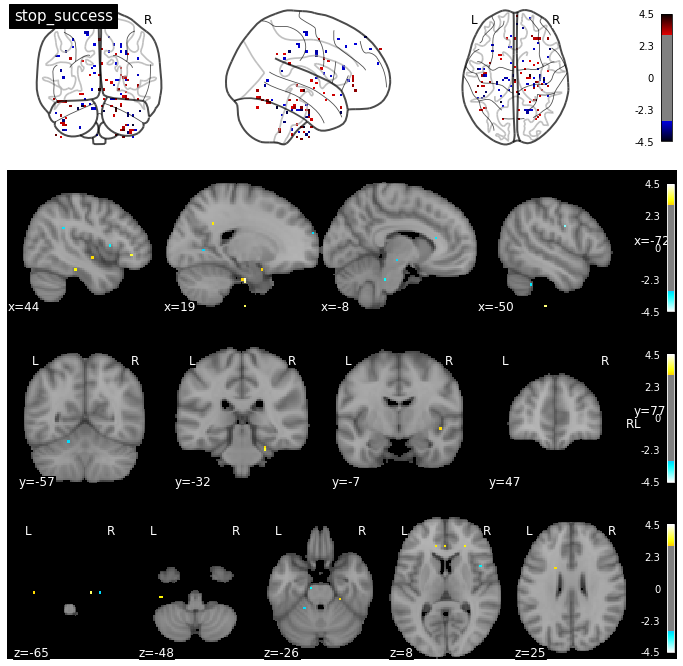

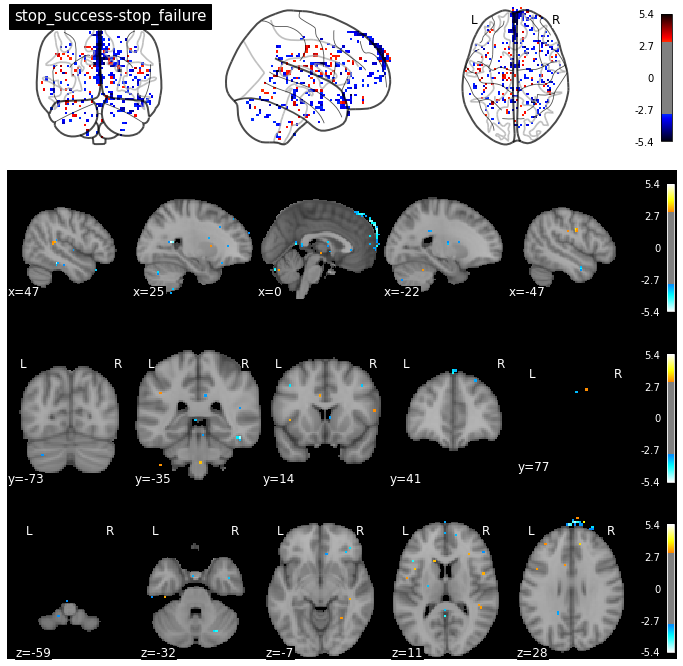

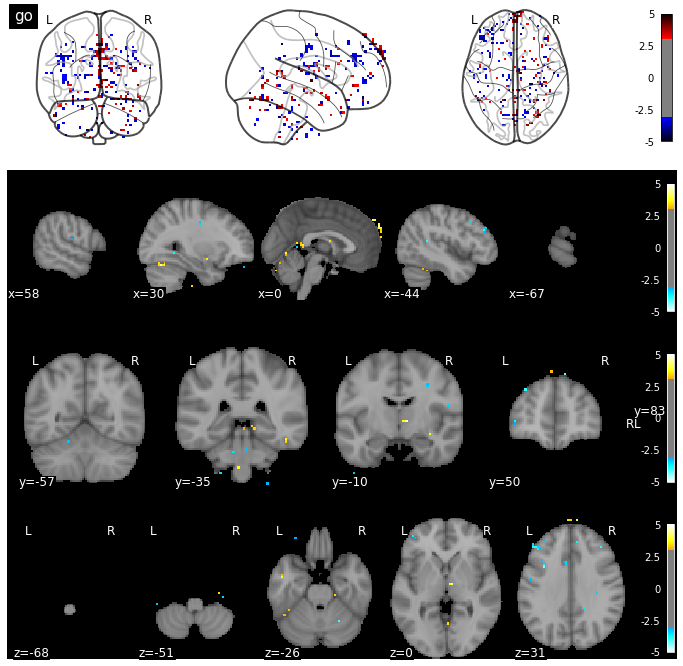

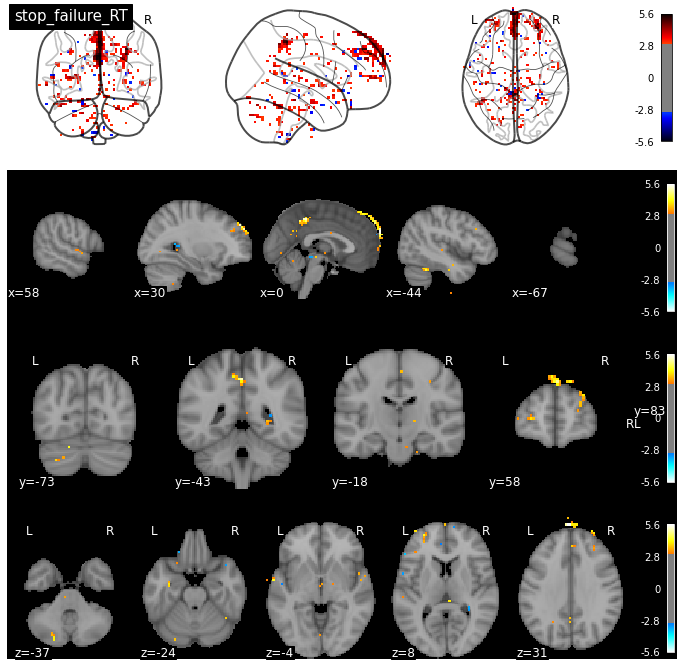

In [7]:
if run_first_level:
    for task in tasks:
        contrast_maps = glob(path.join(first_level_dir, '*s10*', task, '*maps*', '*.nii.gz'))
        for map_file in contrast_maps:
            contrast_name = map_file[map_file.index('contrast')+9:].rstrip('.nii.gz')
            f = plot_map(map_file, title=contrast_name)
            if save:
                output = map_file.replace('.nii.gz', '_plots.pdf')
                f.savefig(output)

# Second Level Visualization

In [62]:
import matplotlib.pyplot as plt
import numpy as np
def plot_task_maps(contrast_maps, suptitle, stat_kwargs=None):
    print(suptitle)
    if stat_kwargs is None:
        stat_kwargs = {}
    # set up plot
    f, axes = plt.subplots(len(contrast_maps), 1, figsize=(20,len(contrast_maps)*5), squeeze=False)
    plt.suptitle(suptitle, fontsize=36)
    
    n = np.arange(-40, 67, 15)
    # plot indepth stats brain
    stat_args = {'threshold': 3,
                 'cut_coords': n,
                 'black_bg': True}
    stat_args.update(**stat_kwargs)
    
    #plot a contrast per row
    for idx, contrast_map in enumerate(contrast_maps):
        title = contrast_map[contrast_map.index('contrast')+9:].rstrip('.nii.gz') #get contrast name
        print(title)
        plotting.plot_stat_map(contrast_map, title=title, display_mode='z', axes=axes[idx][0], **stat_args)
    plt.subplots_adjust(hspace=0)
    return f

running!
ANT
../../../tmp/OAK/data/uh2/aim1/BIDS_scans/derivatives/2ndlevel/ANT/secondlevel-RT-False_beta-False_maps
ANT_RT-False
task


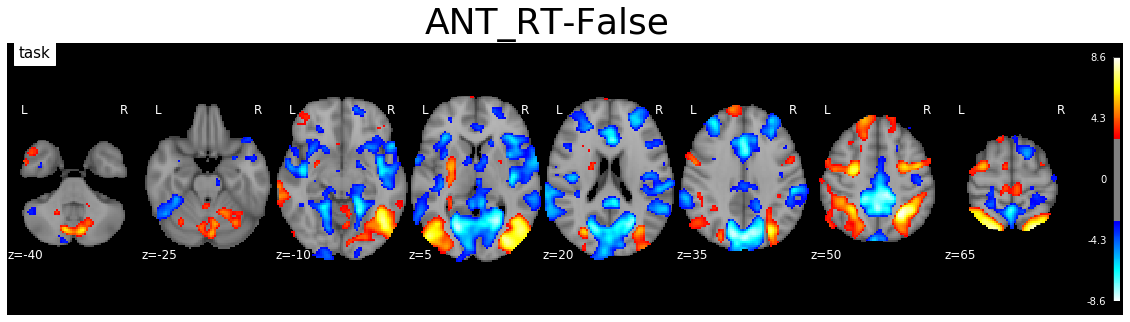

ANT_RT-False
task_raw_tfile
ANT_RT-False
task_corrected_tfile
../../../tmp/OAK/data/uh2/aim1/BIDS_scans/derivatives/2ndlevel/ANT/secondlevel-RT-True_beta-False_maps
ANT_RT-True
RT
task


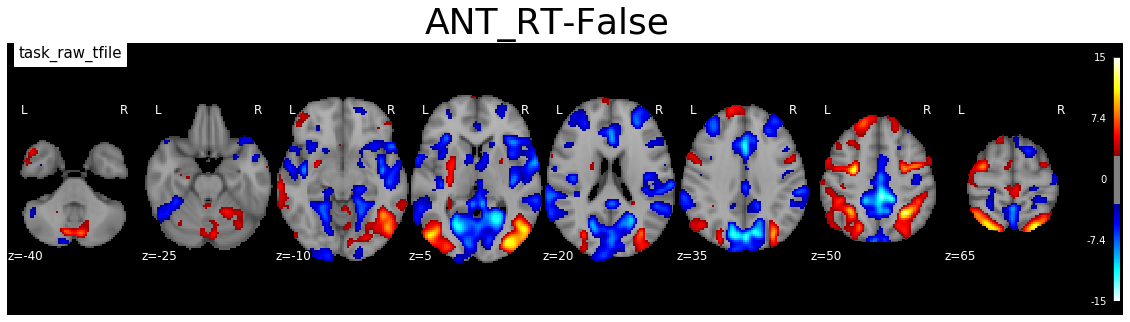

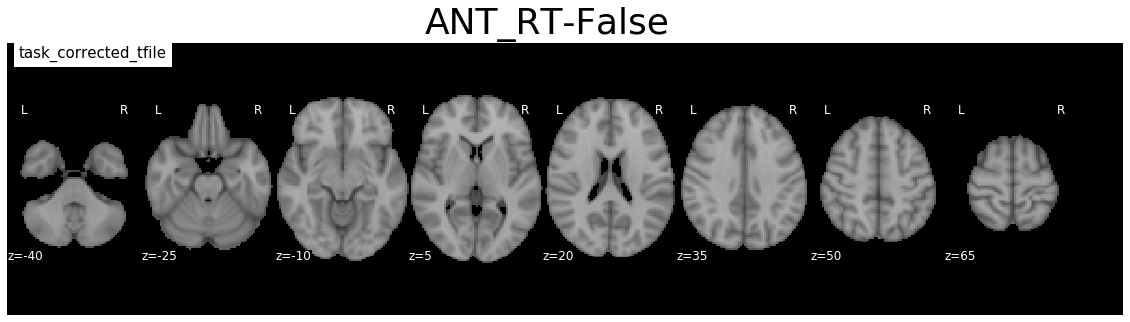

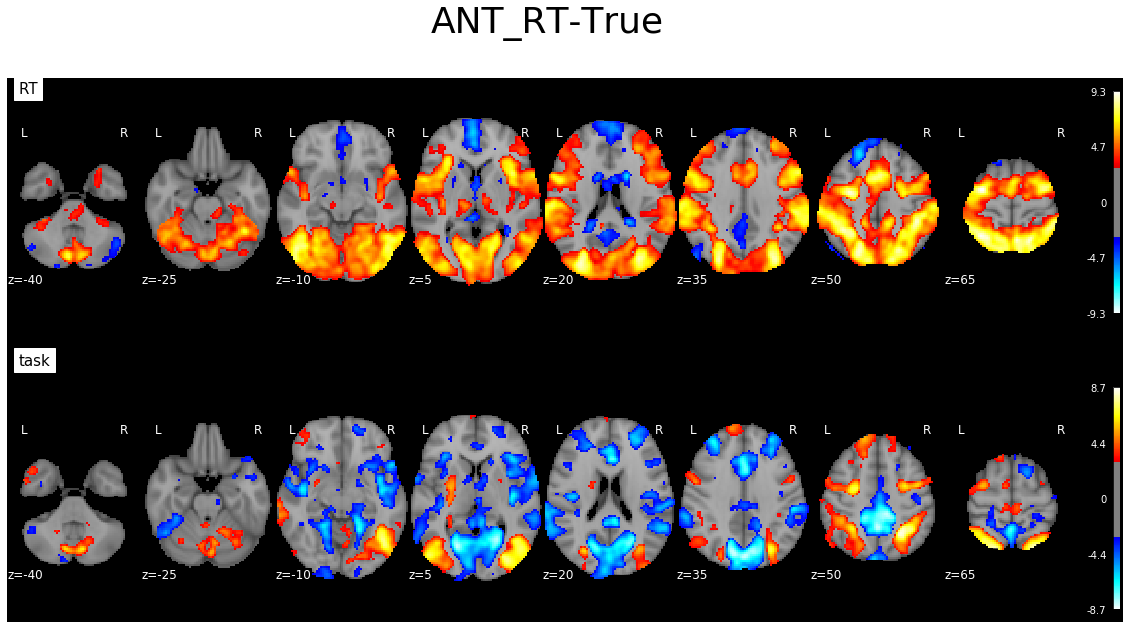

ANT_RT-True
RT_raw_tfile
task_raw_tfile
ANT_RT-True
RT_corrected_tfile
task_corrected_tfile
CCTHot
../../../tmp/OAK/data/uh2/aim1/BIDS_scans/derivatives/2ndlevel/CCTHot/secondlevel-RT-False_beta-False_maps
CCTHot_RT-False
task


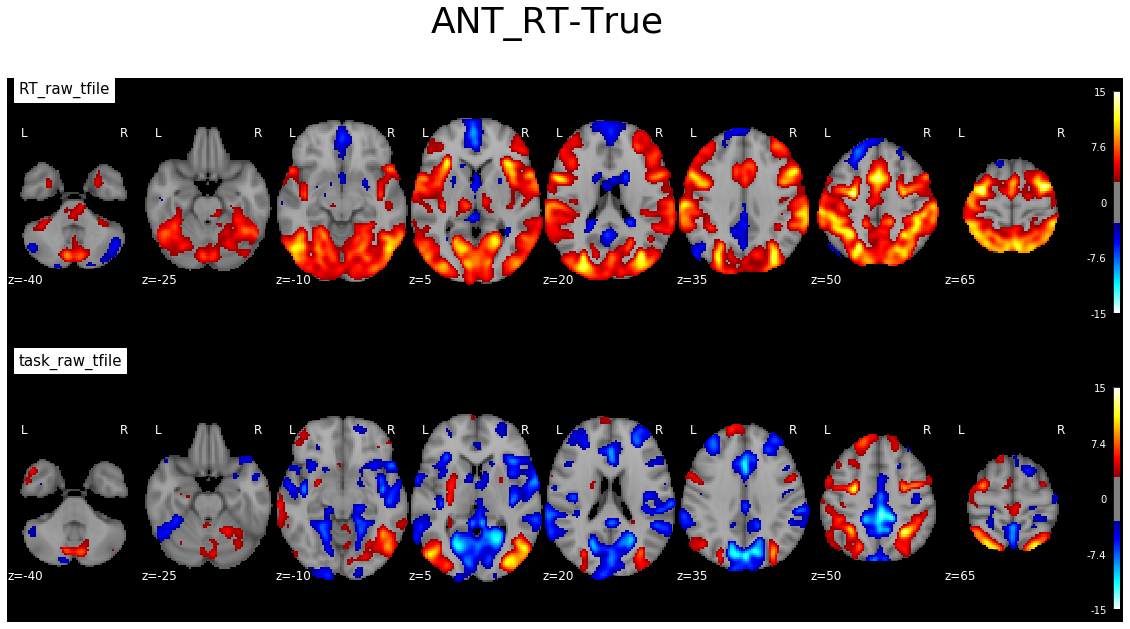

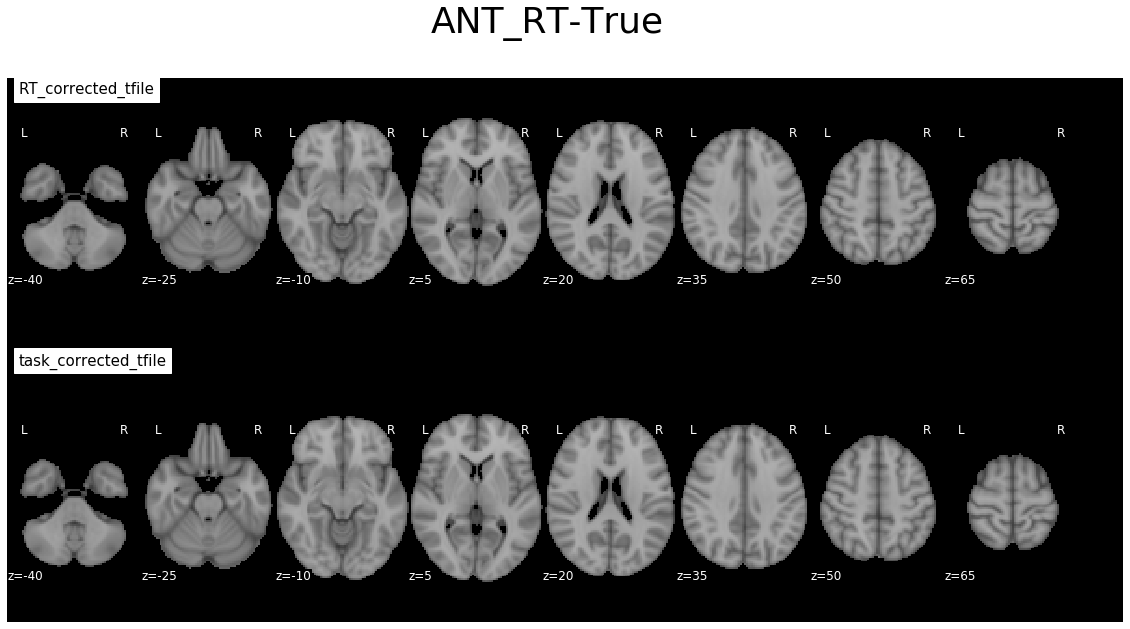

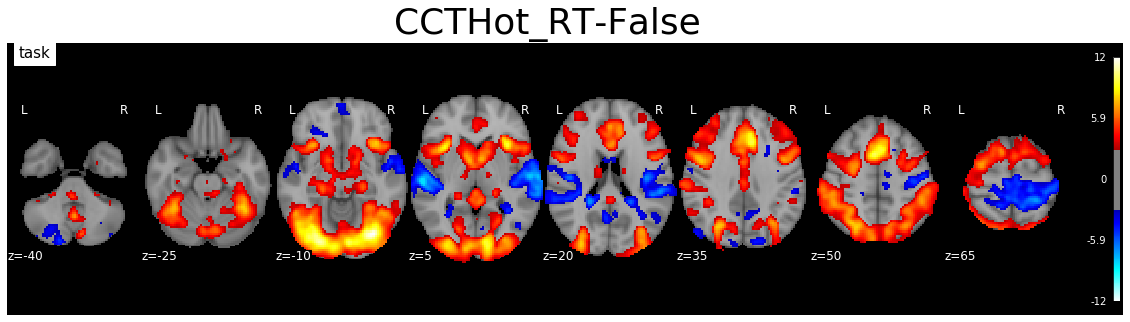

CCTHot_RT-False
task_raw_tfile
CCTHot_RT-False
task_corrected_tfile
../../../tmp/OAK/data/uh2/aim1/BIDS_scans/derivatives/2ndlevel/CCTHot/secondlevel-RT-True_beta-False_maps
CCTHot_RT-True
RT
task


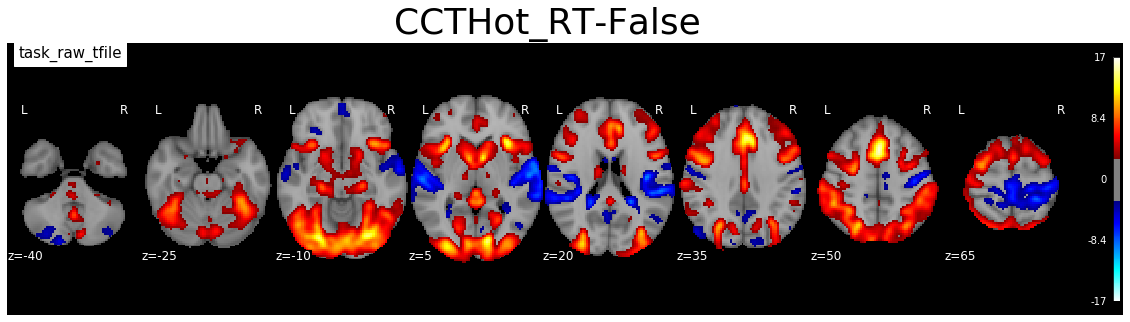

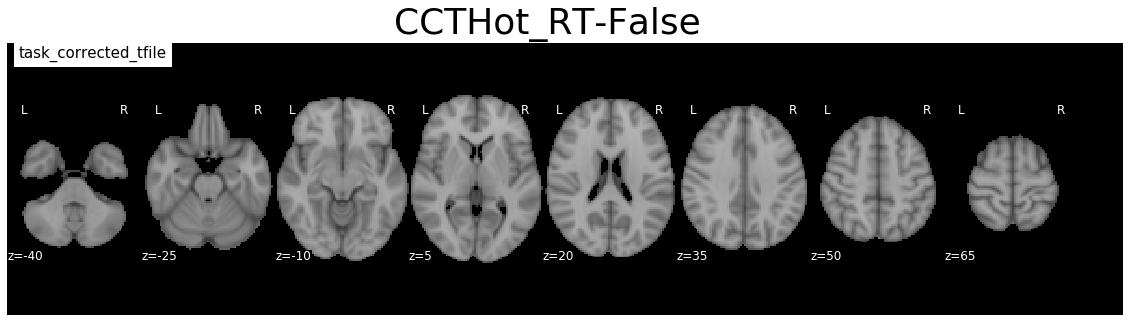

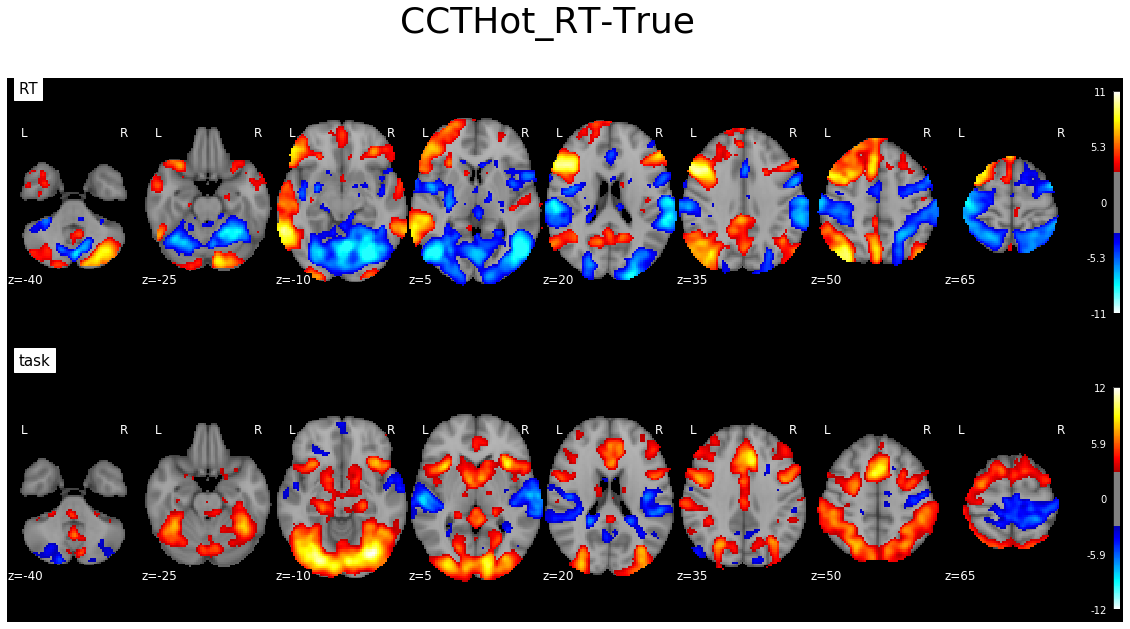

CCTHot_RT-True
RT_raw_tfile
task_raw_tfile
CCTHot_RT-True
RT_corrected_tfile
task_corrected_tfile
discountFix
../../../tmp/OAK/data/uh2/aim1/BIDS_scans/derivatives/2ndlevel/discountFix/secondlevel-RT-False_beta-False_maps
discountFix_RT-False
task


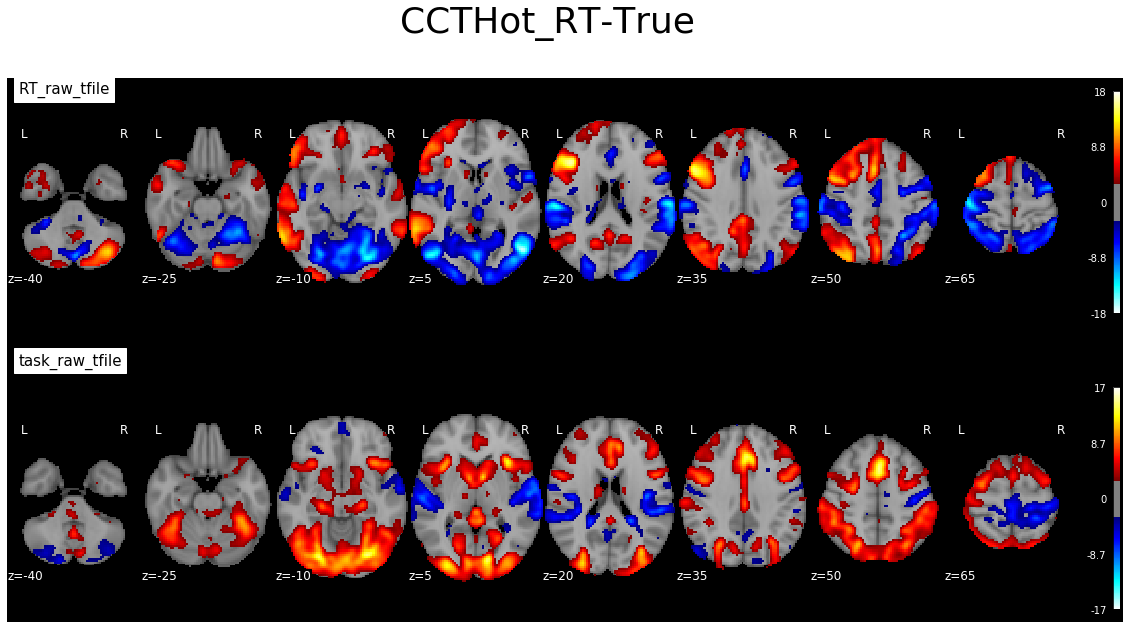

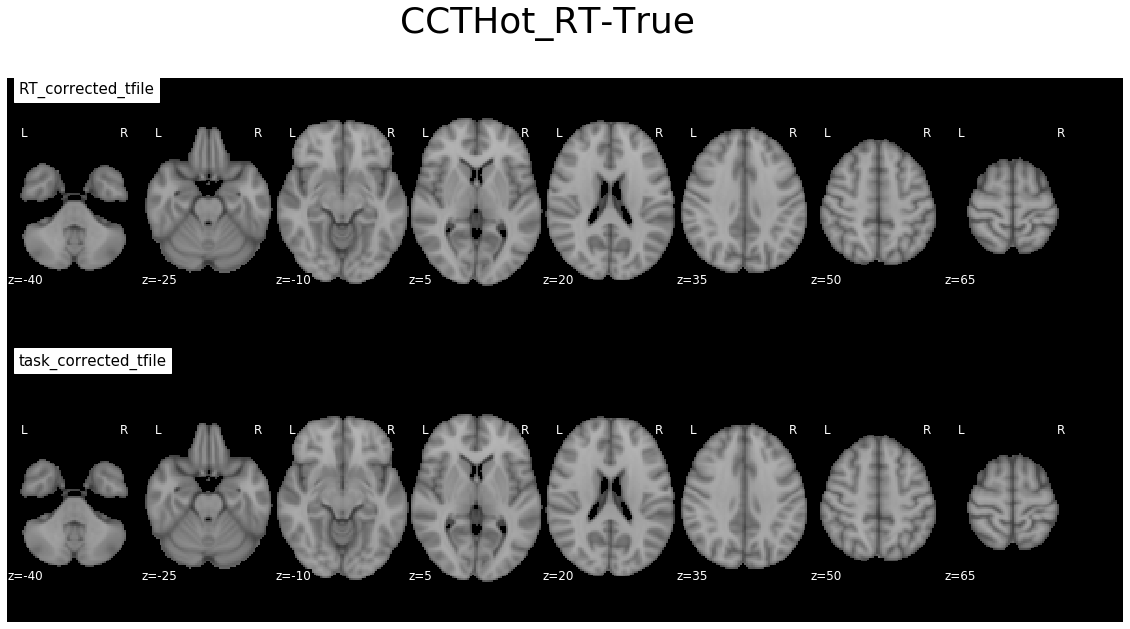

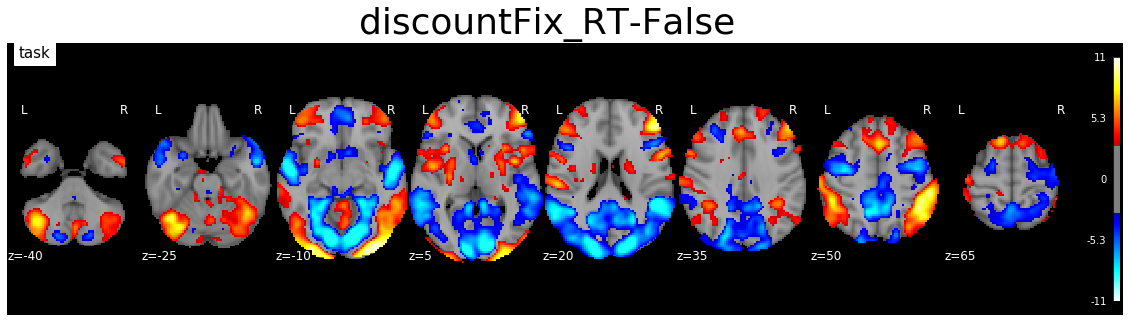

discountFix_RT-False
task_raw_tfile
discountFix_RT-False
task_corrected_tfile
../../../tmp/OAK/data/uh2/aim1/BIDS_scans/derivatives/2ndlevel/discountFix/secondlevel-RT-True_beta-False_maps
discountFix_RT-True
RT
task


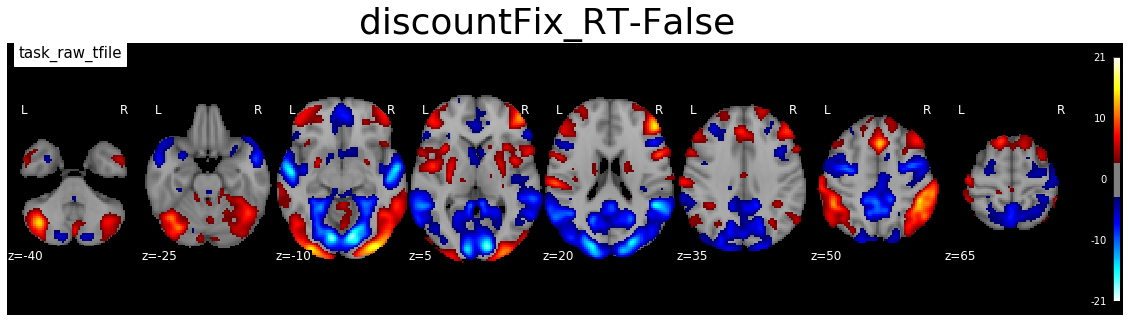

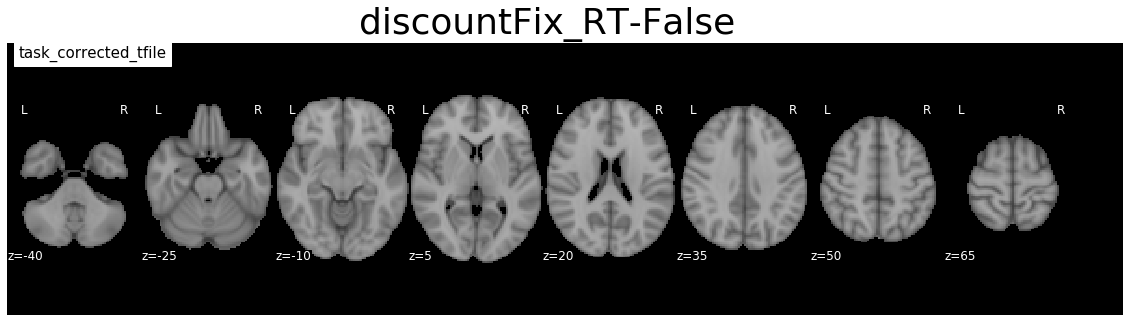

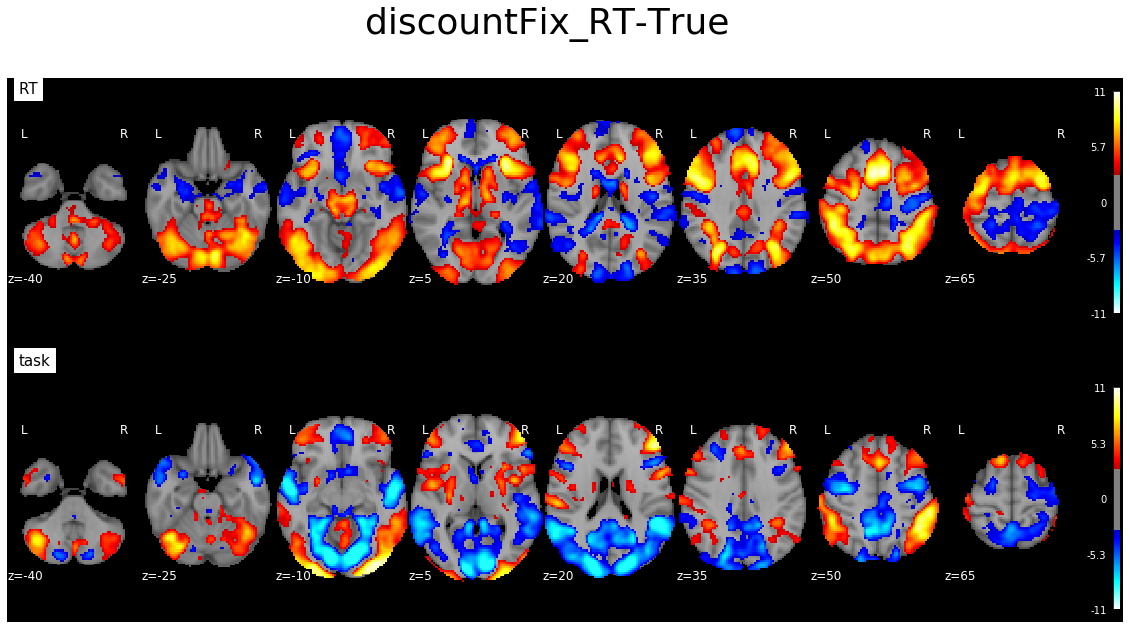

discountFix_RT-True
RT_raw_tfile
task_raw_tfile
discountFix_RT-True
RT_corrected_tfile
task_corrected_tfile
DPX
../../../tmp/OAK/data/uh2/aim1/BIDS_scans/derivatives/2ndlevel/DPX/secondlevel-RT-False_beta-False_maps
DPX_RT-False
AX
AY-BY
AY
BX-BY
BX
BY
task


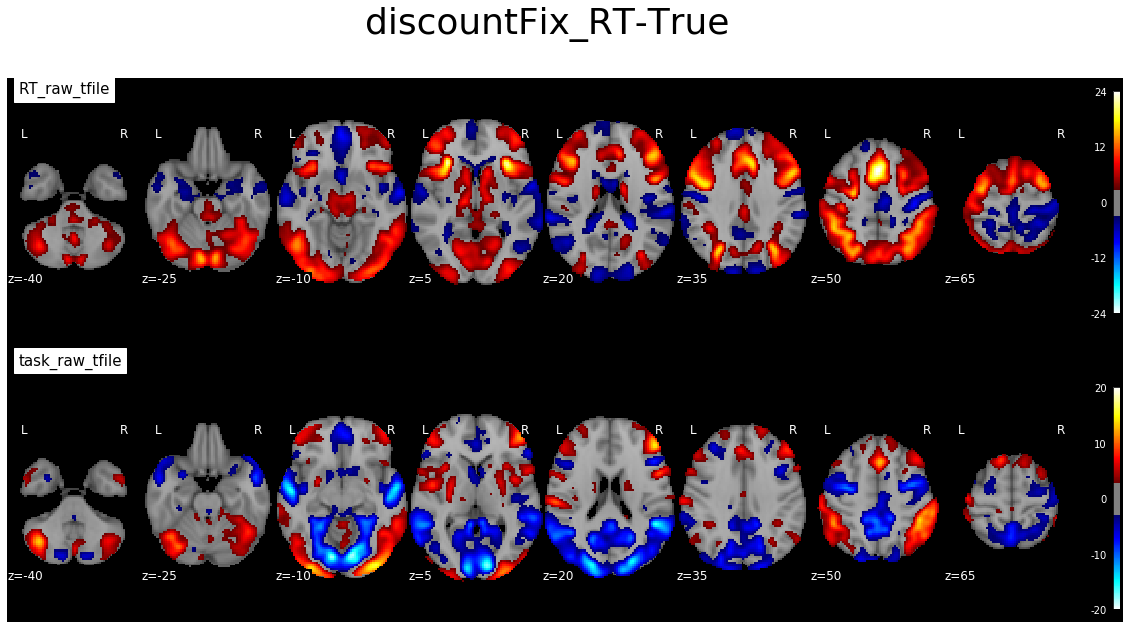

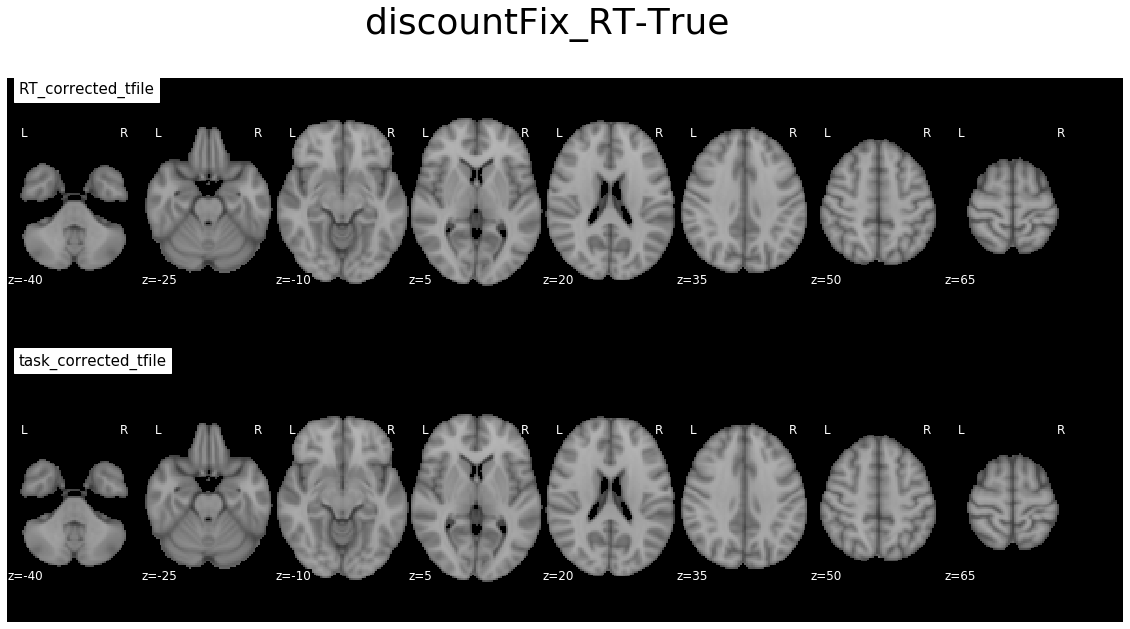

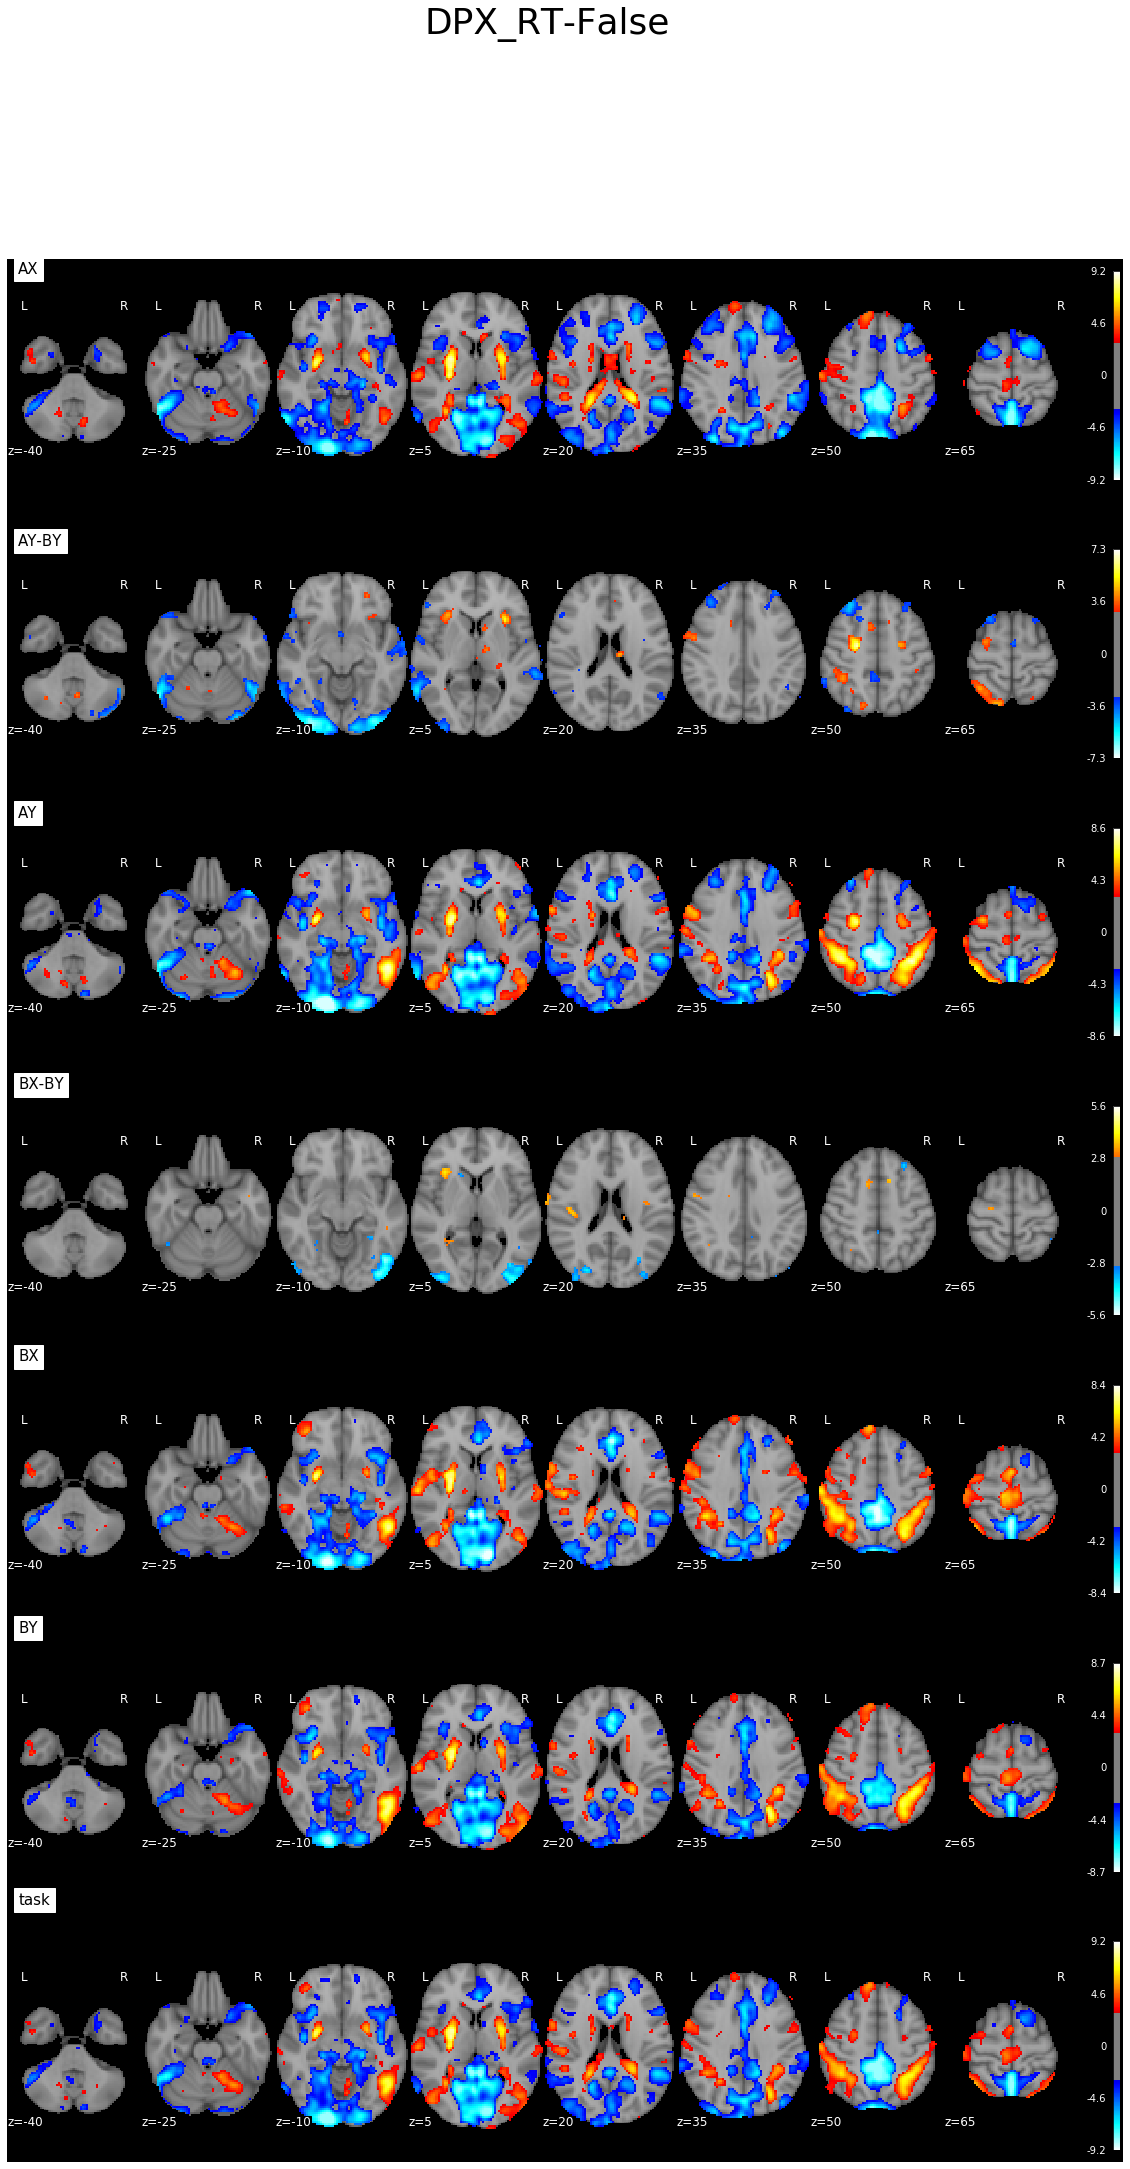

DPX_RT-False
AX_raw_tfile
AY-BY_raw_tfile
AY_raw_tfile
BX-BY_raw_tfile
BX_raw_tfile
BY_raw_tfile
task_raw_tfile
DPX_RT-False
AX_corrected_tfile
AY-BY_corrected_tfile
AY_corrected_tfile
BX-BY_corrected_tfile
BX_corrected_tfile
BY_corrected_tfile
task_corrected_tfile
../../../tmp/OAK/data/uh2/aim1/BIDS_scans/derivatives/2ndlevel/DPX/secondlevel-RT-True_beta-False_maps
DPX_RT-True
AX
AY-BY
AY


KeyboardInterrupt: 

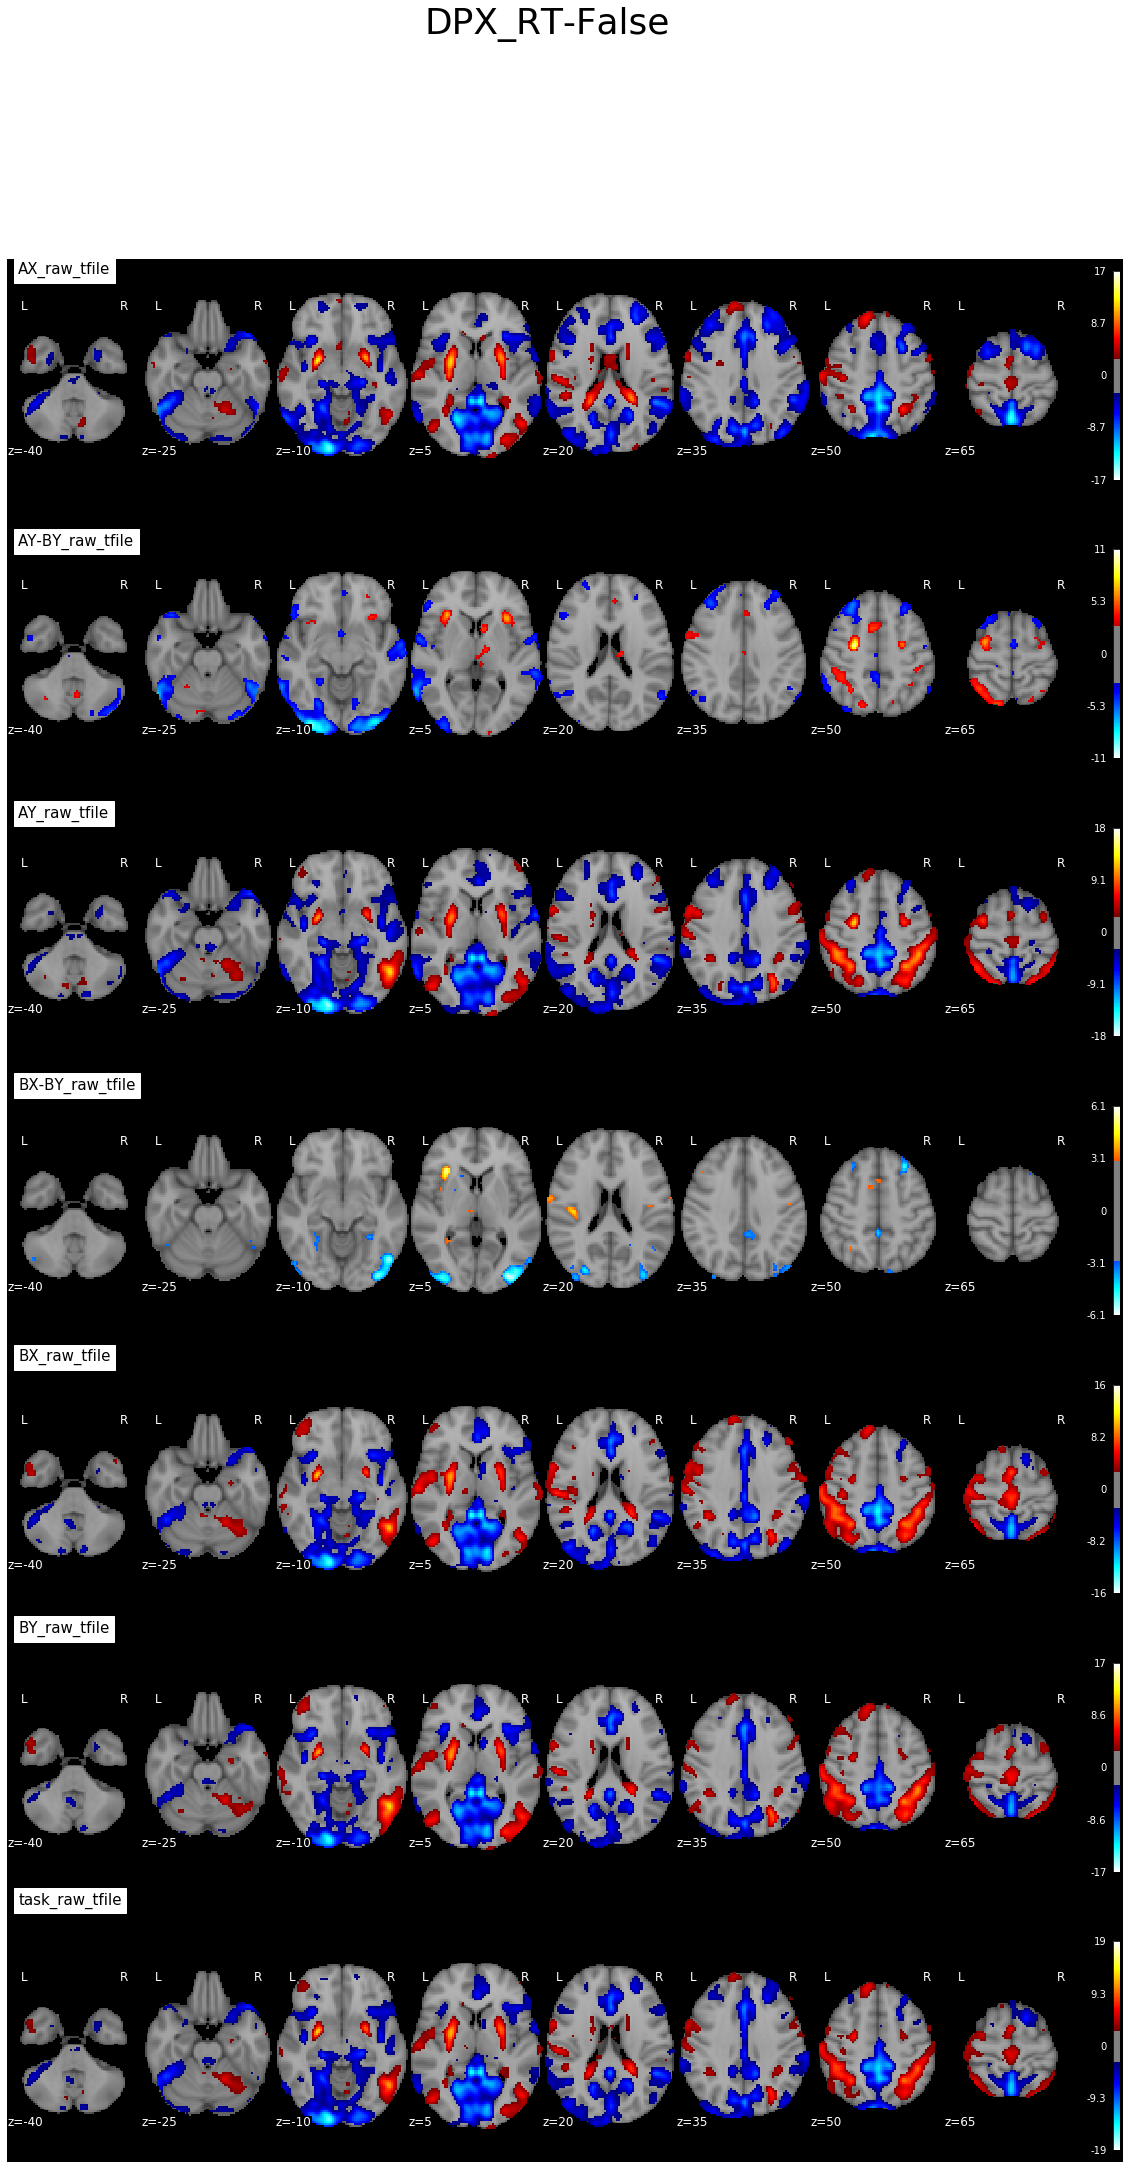

Error in callback <function flush_figures at 0x1a1e8f4a60> (for post_execute):


KeyboardInterrupt: 

In [63]:
group='NONE'
run_second_level = True
if run_second_level:
    print('running!')
    for task in tasks:
        print(task)
        contrast_dirs = sorted(glob(path.join(second_level_dir, task, '*maps')))
        for contrast_dir in contrast_dirs:
            if group == 'NONE':
                out_dir = contrast_dir
            else:
                out_dir = path.join(contrast_dir, group)
            print(out_dir)
            contrast_maps = sorted(glob(path.join(out_dir, '*.nii.gz')))
            beta_maps = [mapi for mapi in contrast_maps if 'tfile' not in mapi] 
            t_maps = [mapi for mapi in contrast_maps if 'raw_tfile' in mapi] 
            corrected_t_maps = [mapi for mapi in contrast_maps if 'corrected_tfile' in mapi] 
            RT_flag = 'RT-True' in contrast_dir
            curr_title = task+'_RT-'+str(RT_flag)
            
            f_beta = plot_task_maps(beta_maps, curr_title)
            plt.show()
            f_raw_t = plot_task_maps(t_maps, curr_title)
            f_corr_t = plot_task_maps(corrected_t_maps, curr_title)
#             if save:
#                 output_beta = path.join(out_dir, task+'_plots.pdf')
#                 f_beta.savefig(output_beta)
#                 output_raw_t = path.join(out_dir, task+'_raw_tfile_plots.pdf')
#                 f_beta.savefig(output_raw_t)
#                 output_corr_t = path.join(out_dir, task+'_corrected_tfile_plots.pdf')
#                 f_beta.savefig(output_corr_t)  